<a href="https://colab.research.google.com/github/saadz-khan/Text2Image/blob/master/pixray_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

follow me on twitter: [@dazhizhong](https://twitter.com/DazhiZhong) and find me on [Github](https://github.com/dazhiZhong)

# setup

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Setup

#@markdown Please execute this cell by pressing the _Play_ button 
#@markdown on the left. You should only need to run this part once.

#@markdown **Note**: This installs the software on the Colab 
#@markdown notebook in the cloud and not on your computer.

#@markdown When complete you will need to do Runtime -> Restart Runtime from the menu

# Add a gpu check
nvidia_output = !nvidia-smi --query-gpu=memory.total --format=noheader,nounits,csv
gpu_memory = int(nvidia_output[0])
if gpu_memory < 14000:
  print(f"--> GPU check: ONLY {gpu_memory} MiB available: WARNING, some things might not work <--")
else:
  print(f"GPU check: {gpu_memory} MiB available: this should be fine")

print("Installing...")
from IPython.utils import io
with io.capture_output() as captured:
  !rm -Rf pixray
  !git clone --recursive https://github.com/pixray/pixray
  !pip install -r pixray/requirements.txt
  !pip uninstall -y tensorflow 
  !git clone https://github.com/pixray/diffvg
  %cd diffvg
  !git submodule update --init --recursive
  !python setup.py install
  %cd ..
  !pip freeze | grep torch

import os
if not os.path.isfile("first_init_complete"):
  # put stuff in here that should only happen once
  !mkdir -p models
  os.mknod("first_init_complete")
  print("Please choose Runtime -> Restart Runtime from the menu to continue!")
else:
  print("Setup Complete! Good luck with your drawing")


In [1]:
#@title Installing/Setup { vertical-output: true }
!pip3 install opencv-python==4.2.0.32
!pip3 install vispy==0.6.4
!pip3 install moviepy==1.0.2
!pip3 install transforms3d==0.3.1
!pip3 install networkx==2.3
!sudo apt install sed
!git clone https://github.com/dazhizhong/3d-photo-inpainting.git
%cd 3d-photo-inpainting
!git checkout 20361ff
!sh download.sh
#!sed -i 's/offscreen_rendering: True/offscreen_rendering: False/g' argument.yml
%cd ..
!rm -rf pixray
!git clone  https://github.com/pixray/pixray.git
!cd pixray && git checkout de99b86
!pip install -r pixray/requirements.txt
!pip uninstall -y tensorflow 
!git clone https://github.com/pixray/diffvg
%cd diffvg
!git checkout c40ec08
!git submodule update --init --recursive
!python setup.py install
%cd ..
!pip freeze | grep torch
!mkdir models
exit()

     |████████████████████████████████| 28.2 MB 1.2 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 2.3 MB 8.2 MB/s 
     |████████████████████████████████| 890 kB 79.4 MB/s 
     |████████████████████████████████| 7.8 MB 6.6 MB/s 
     |████████████████████████████████| 3.3 MB 69.3 MB/s 
     |████████████████████████████████| 26.9 MB 1.1 MB/s 
     |████████████████████████████████| 4.3 MB 64.6 MB/s 
  Created wheel for moviepy: filename=moviepy-1.0.2-py3-none-any.whl size=110744 sha256=1d6e891369e5be6d7d0a9f822f7b7f1ada4fc87297

     |████████████████████████████████| 62 kB 1.4 MB/s 
  Created wheel for transforms3d: filename=transforms3d-0.3.1-py3-none-any.whl size=59373 sha256=d4862985f0d17b48d251a3f7b0295b28f859a63d57aa15031da812e1211955da
  Stored in directory: /root/.cache/pip/wheels/b5/b7/93/8985551f83720ce37548a5b543c75380bb707955a9c2c5d28c
Successfully built transforms3d
     |████████████████████████████████| 1.7 MB 9.0 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556008 sha256=0381698cadd2fa12d32c9300c642d61e424fd55e8634d349e05ecd06c397376c
  Stored in directory: /root/.cache/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sour

Found existing installation: tensorflow 2.7.0
Uninstalling tensorflow-2.7.0:
  Successfully uninstalled tensorflow-2.7.0
Cloning into 'diffvg'...
remote: Enumerating objects: 283, done.
remote: Total 283 (delta 0), reused 0 (delta 0), pack-reused 283
Receiving objects: 100% (283/283), 10.27 MiB | 26.55 MiB/s, done.
Resolving deltas: 100% (107/107), done.
/content/diffvg
Note: checking out 'c40ec08'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at c40ec08 Merge pull request #2 from DazhiZhong/bugfix
Submodule 'pybind11' (https://github.com/pybind/pybind11.git) registered for path 'pybind11'
Submodule 'thrust' (https://gith

# main

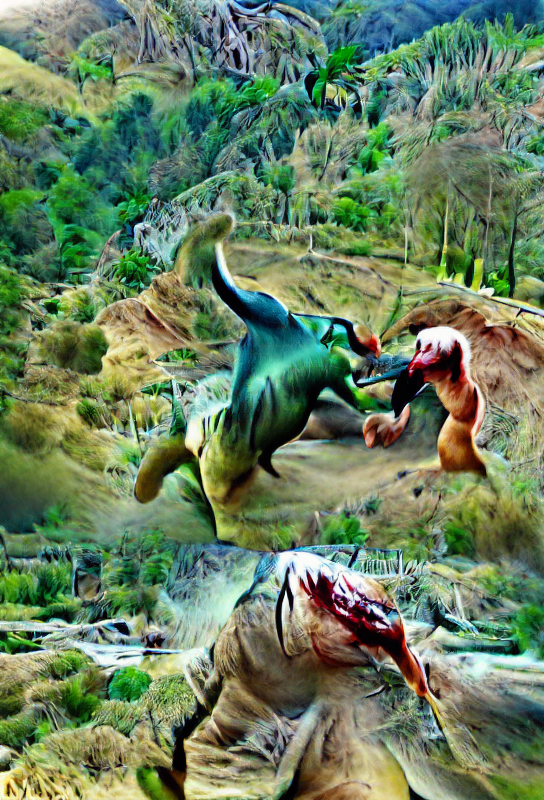

iter: 120, finished (-6=>2.74)



In [26]:
#@title Generate image from prompt { vertical-output: true }
import sys
import regex as re
import os
sys.path.append("pixray")
import pixray

punctuations = '''|!()-[]{};:'"\,<>./?@#$%^&*_~'''

prompts = "two violent dinosaurs battle in a Jurassic valley, prehistoric, gruesome, real realism, cinematic action" #@param {type:"string"}
drawer = "vqgan"

no_punct = ""
for char in prompts:
   if char not in punctuations:
       no_punct = no_punct + char

init_image = ""#@param {type:"string"}
#init_image = re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', init_image)
#init_image = re.findall('^/[\w\.\-]+$', init_image)

output_image = ""#@param {type:"string"}


if not init_image:
  init_image = None


video = False #@param {type:"boolean"}

display_clear = True #@param {type:"boolean"}

iterations = 120 #@param {type:"number"}

pixel_scale = 0.75 #@param {type:"slider", min:0.25, max:2.0, step:0.25}

quality = 'supreme' #@param ["normal", "better", "best", "supreme"]

optimiser = 'Adam' #@param ["Adam", "DiffGrad"]

iterations = 120 #@param {type:"number"}

palette = False #@param {type:"boolean"}
if palette:
  use_palette = "[#000000, #071008, #0e2011, #153019, #1c4022, #23502a, #2a6033, #31703b, #388044, #3f8f4c, #469f54, #4daf5d, #54bf65, #5bcf6e, #62df76, #69ef7f];black->white" #@param {type:"string"}

#print(init_image)

#@markdown When you have the settings you want, press the play button on the left.
#@markdown The system will save these and start generating images below.
#@markdown When that is done you can change these
#@markdown settings and see if you get different results. Or if you get
#@markdown impatient, just select "Runtime -> Interrupt Execution".
#@markdown Note that the first time you run it may take a bit longer
#@markdown as nessary files are downloaded.
#@markdown
#@markdown *Advanced: you can also edit this cell and add additional
#@markdown settings, combining settings from different notebooks.*

pixray.reset_settings()
pixray.add_settings(prompts=prompts)
pixray.add_settings(quality="supreme",
                    size=[544,800],
                    iterations=iterations,
                    drawer=drawer,
                    display_clear=display_clear,
                    make_video=video,
                    scale = 2,
                    optimiser = optimiser,
                    init_image = init_image)

settings = pixray.apply_settings()
pixray.do_init(settings)
pixray.do_run(settings)

os.rename('output.png', f'{no_punct}.png')
!rm -rf ./output.png
if video:
  os.rename('output.mp4', f'{no_punct}.mp4')
  !rm -rf ./output.mp4

In [ ]:
dimport torch
torch.cuda.empty_cache()

import shutil
# shutil.copy("output.png","3d-photo-inpainting/image")

from PIL import Image
import os
import glob
for f in glob.glob("3d-photo-inpainting/image/*.*"):
    os.remove(f)
im = Image.open(settings.output)
im.save(f"3d-photo-inpainting/image/input.jpg")


import time
begin = time.time()
for f in glob.glob("3d-photo-inpainting/video/*.*"):
    os.remove(f)
%cd 3d-photo-inpainting 
!python main.py --config argument.yml
%cd ..
print(f"finished in {time.time() - begin}")


from IPython import display
import glob
from PIL import Image
from IPython.display import HTML
from base64 import b64encode
from IPython.utils import io

fps = glob.glob("3d-photo-inpainting/video/*")
for f in fps:
    mp4 = open(f,'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    # display.clear_output()
    display.display(HTML("""
    <video height=350 controls loop autoplay>
        <source src="%s" type="video/mp4">
    </video>
    """ % data_url))